In [1]:
#important imports
import pandas as pd
import math
from scipy.stats import skew, kurtosis
from statsmodels.tsa import stattools
from sklearn.preprocessing import StandardScaler
import csv

In [14]:
#replace <<filepath>> with the path of your local file
#link to the file used: https://archive.ics.uci.edu/ml/datasets/User+Identification+From+Walking+Activity

import pandas as pd 
 
df = pd.read_csv("<<filepath>>/User Identification From Walking Activity/1.csv")

df.describe()

,0,0.69464,3.1735,7.5048
count,5068.000000,5068.000000,5068.000000,5068.000000
mean,76.832608,-3.555093,8.559052,-0.845743
std,44.229309,2.486158,2.955841,2.911633
min,0.030639,-9.343600,0.000000,-7.927000
25%,38.592500,-5.284700,6.129200,-2.601500
50%,76.835000,-3.486800,8.921300,-1.144100
75%,115.017500,-2.179300,10.651000,-0.040861
max,154.200000,10.951000,15.786000,12.599000


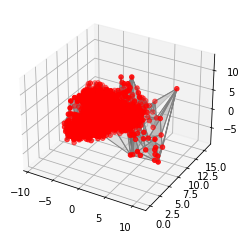

In [15]:
import numpy as np  
import matplotlib.pyplot as plt  
import mpl_toolkits.mplot3d 
import pandas as pd 

X = df.iloc[:, 1] 
Y = df.iloc[:, 2] 
Z = df.iloc[:, 3] 

X1=-3.555093
Y1=8.559052
Z1=-0.845743
 
# Plot X,Y,Z 
fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d') 
ax.plot_trisurf(X, Y, Z, color='white', edgecolors='grey', alpha=0.5) 
ax.scatter(X, Y, Z, c='red')

#ax.scatter(X1, Y1, Z1, c='red')
plt.show()

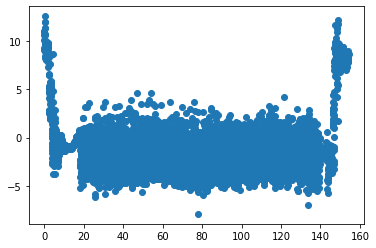

In [16]:
X = df.iloc[:, 0] 
Z = df.iloc[:, 3] 

plt.scatter(X, Z)
plt.show()

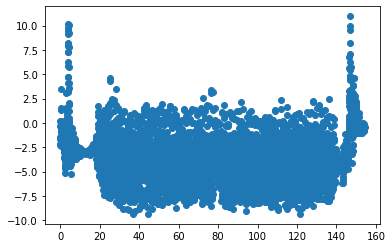

In [17]:
X = df.iloc[:, 0] 
X1 = df.iloc[:, 1] 

plt.scatter(X, X1)
plt.show()

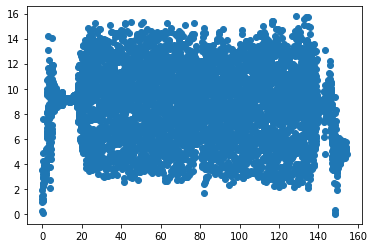

In [18]:
X = df.iloc[:, 0] 
Y = df.iloc[:, 2] 

plt.scatter(X, Y)
plt.show()

C:\Users\aparajitas\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


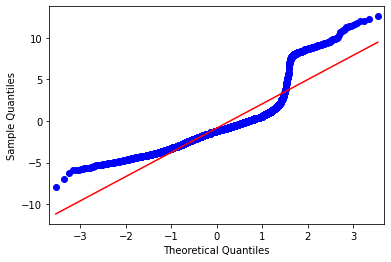

In [19]:
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# seed the random number generator
#seed(1)
# generate univariate observations
#data = 5 * randn(100) + 50
data = df.iloc[:, 3] 
# q-q plot
qqplot(data, line='s')
pyplot.show()

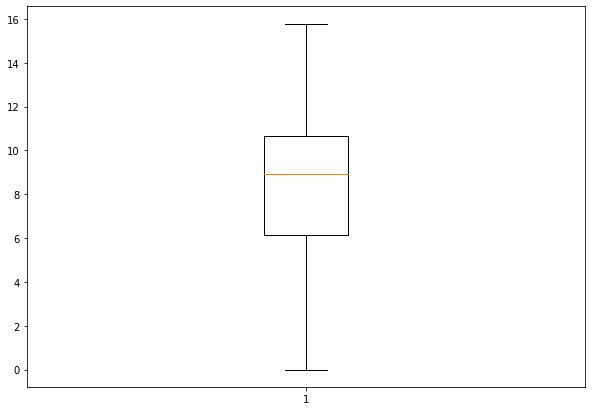

In [20]:
data = df.iloc[:, 2] 
 
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(data)
 
# show plot
plt.show()

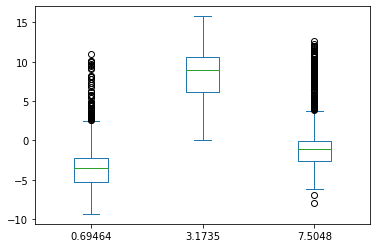

In [21]:
df2= df.drop(['0'], axis = 1)
df2.plot(kind='box');

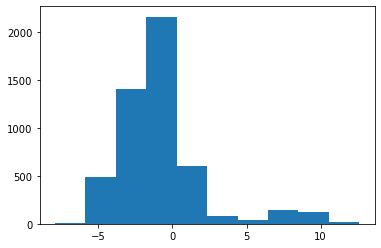

In [22]:
# histogram plot
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
#data = 5 * randn(100) + 50
data = df.iloc[:, 3]
# histogram plot
pyplot.hist(data)
pyplot.show()

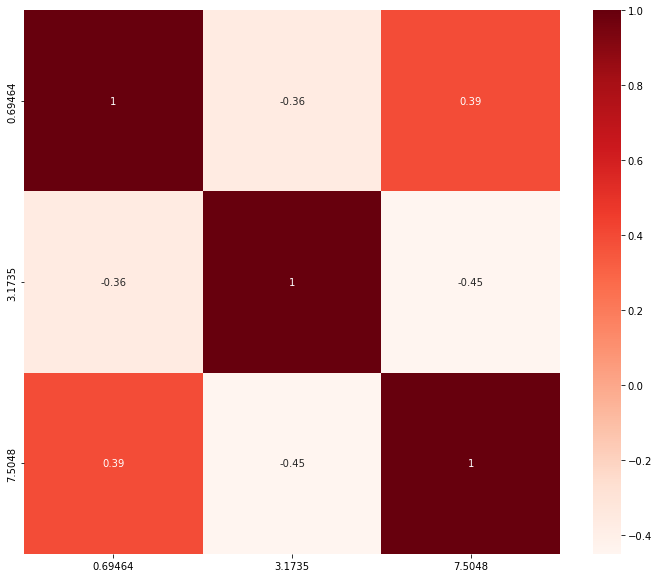

In [23]:
import seaborn as sns
plt.figure(figsize=(12,10))

df1= df.drop(['0'], axis = 1)
cor = df1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

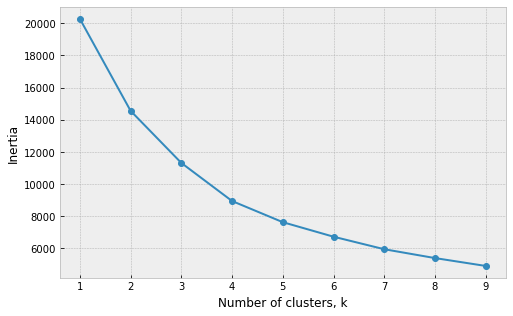

In [26]:
from sklearn.cluster import KMeans 

scaler = StandardScaler()
Data = scaler.fit_transform(df)
#check the optimal k value
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(Data)
    inertias.append(model.inertia_)

plt.figure(figsize=(8,5))
plt.style.use('bmh')
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

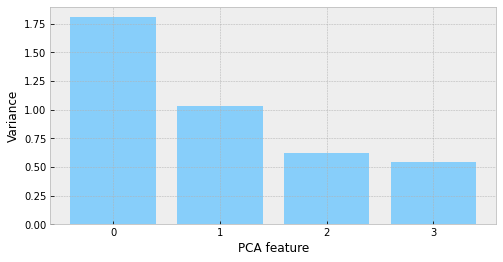

In [27]:
#check for optimal number of features
from sklearn.decomposition import PCA
pca = PCA(random_state=123)
pca.fit(Data)
features = range(pca.n_components_)

plt.figure(figsize=(8,4))
plt.bar(features[:15], pca.explained_variance_[:15], color='lightskyblue')
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features[:15])
plt.show()